In [27]:
import pandas as pd
from pandas import DataFrame

df = pd.read_csv("../notebooks/refined_dataset.csv")

In [28]:
# balace the dataset
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X,y = smote.fit_resample(df.drop(columns='diagnosis'), df['diagnosis'])

In [29]:
# create training and test datasets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape

((368, 15), (93, 15))

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, \
    recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [32]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1, precision, recall, roc_auc

In [33]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "XGB Classifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "SupportVector Classifier": SVC(),
    "Ada Boost Classifier": AdaBoostClassifier()
}

In [36]:
len(list(models))

9

In [44]:
# create a function that will evaluate the models and return a report

def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models_list = []
    accuracy_list = []
    auc = []
    print(range(len(list(models))))
    for i in range(len(list(models))):
        print(i)
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # training set performance
        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, \
            model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)
        
        # test set performance
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, \
            model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)
        
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model name', 'Accuracy']).sort_values(by='Accuracy', ascending=True)
        
    return report


In [45]:
base_model_report = evaluate_models(X = X, y= y, models=models)

range(0, 9)
0
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9140
- F1 score: 0.8462
- Precision: 0.9167
- Recall: 0.7857
- Roc Auc Score: 0.8775


1
Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8602
- F1 score: 0.7636
- Precision: 0.7778
- Recall: 0.7500
- Roc Auc Score: 0.8288


2
Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9355
- F1 score: 0.8889
- Precision: 0.9231
- Recall: 0.8571
- Roc Auc Score: 0.9132


3
Logistic Regression
Model perfo

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [43]:
base_model_report

,Model name,Accuracy
1,Decision Tree,0.870968
0,Random Forest,0.903226
4,KNeighbors Classifier,0.924731
2,Gradient Boosting,0.935484
5,XGB Classifier,0.946237
6,CatBoosting Classifier,0.946237
7,SupportVector Classifier,0.946237
8,Ada Boost Classifier,0.956989
3,Logistic Regression,0.967742


In [46]:
# Hyper parameter tuning

logistic_regression_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500]
}

adaboost_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [47]:
# models for hyper parameter tuning
randomcv_models = [
    ('XGBClassifier', XGBClassifier(), xgb_params),
    ('SVClassifier', SVC(), svc_params),
    ('AdaBoostClassifier', AdaBoostClassifier(), adaboost_params),
    ('LogisticRegression', LogisticRegression(), logistic_regression_params)
]

In [48]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=1)

    random.fit(X,y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"Best params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.3, max_depth=5, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END col

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, degree=2, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, degree=2, gamma=scale, k

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=200; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=200; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.01, n_estimators=200; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50; total time=   0.0s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150; total time=   0.7s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150; total time=   0.5s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=200; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   0.0s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=50; total time=   0.0s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   0.1s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.1, n_estimators=200; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   0.0s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50; total time=   0.0s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   0.1s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=150; total time=   0.7s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=   1.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=   1.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=200; total time=   1.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=50; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   0.5s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=100; total time=   0.2s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=150; total time=   0.3s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=200; total time=   0.4s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=200; total time=   0.5s


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ......C=0.1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, so

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_it

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] EN

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=10, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV

c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
198 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\model_selection

[CV] END ........C=10, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter

In [49]:
model_param

{'XGBClassifier': {'subsample': 0.5,
  'n_estimators': 50,
  'max_depth': 5,
  'learning_rate': 0.3,
  'colsample_bytree': 0.7},
 'SVClassifier': {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10},
 'AdaBoostClassifier': {'n_estimators': 150,
  'learning_rate': 1,
  'algorithm': 'SAMME.R'},
 'LogisticRegression': {'solver': 'saga',
  'penalty': 'l1',
  'max_iter': 300,
  'C': 1}}

In [50]:
# retrain the model with best params

from sklearn.metrics import roc_auc_score, roc_curve

best_models = {
    'XGB Classifier': XGBClassifier(**model_param['XGBClassifier'], n_jobs=1),
    'SVClassifier': SVC(**model_param['SVClassifier']),
    'Ada Boost Classifier': AdaBoostClassifier(**model_param['AdaBoostClassifier']),
    'Logistic Regression': LogisticRegression(**model_param['LogisticRegression'])
}

tuned_report = evaluate_models(X = X, y = y, models = best_models)

range(0, 4)
0
XGB Classifier
Model performance for Training set
- Accuracy: 0.9946
- F1 score: 0.9903
- Precision: 1.0000
- Recall: 0.9808
- Roc Auc Score: 0.9904
----------------------------------
Model performance for Test set
- Accuracy: 0.9140
- F1 score: 0.8462
- Precision: 0.9167
- Recall: 0.7857
- Roc Auc Score: 0.8775


1
SVClassifier
Model performance for Training set
- Accuracy: 0.9918
- F1 score: 0.9854
- Precision: 1.0000
- Recall: 0.9712
- Roc Auc Score: 0.9856
----------------------------------
Model performance for Test set
- Accuracy: 0.9570
- F1 score: 0.9259
- Precision: 0.9615
- Recall: 0.8929
- Roc Auc Score: 0.9387


2


c:\ProgramData\anaconda3\envs\diagno\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9570
- F1 score: 0.9259
- Precision: 0.9615
- Recall: 0.8929
- Roc Auc Score: 0.9387


3
Logistic Regression
Model performance for Training set
- Accuracy: 0.9864
- F1 score: 0.9754
- Precision: 1.0000
- Recall: 0.9519
- Roc Auc Score: 0.9760
----------------------------------
Model performance for Test set
- Accuracy: 0.9785
- F1 score: 0.9630
- Precision: 1.0000
- Recall: 0.9286
- Roc Auc Score: 0.9643




In [51]:
tuned_report

,Model name,Accuracy
0,XGB Classifier,0.913978
1,SVClassifier,0.956989
2,Ada Boost Classifier,0.956989
3,Logistic Regression,0.978495


In [53]:
best_model = LogisticRegression(**model_param['LogisticRegression'])
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9785
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      0.93      0.96        28

    accuracy                           0.98        93
   macro avg       0.99      0.96      0.97        93
weighted avg       0.98      0.98      0.98        93



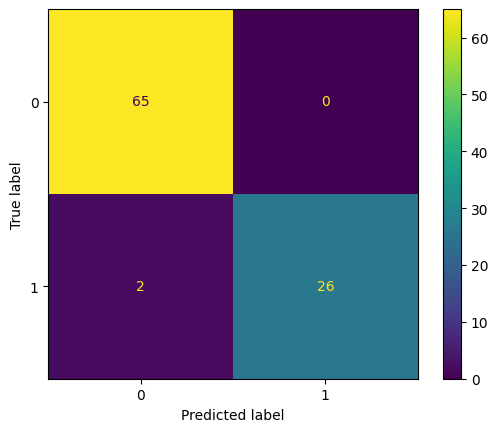

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)